In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

FOLDER_PATH = '../../Datasets/Evaluations/Schema Matching/'
EVAL_OUTPUT = '../../Datasets/Evaluations/Schema Matching/Eval_Output/eval_output.csv'
prompt_name = ''
model_name = ''

In [6]:
import os
import csv

def import_csv_files(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Filter only CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    file_paths = []
    # Loop through each CSV file and import its data
    for csv_file in csv_files:
        file_paths.append(os.path.join(folder_path, csv_file))

    csv_files_stripped = [file[:-4] for file in csv_files]
    return file_paths, csv_files_stripped

# Example usage:
file_paths, csv_files = import_csv_files(FOLDER_PATH)



In [7]:
def multiclass_eval(df):
    cm = metrics.confusion_matrix(df['y_true'], df['y_pred'])
    cm
    plt.figure(figsize=(3,3))
    x_axis_labels = ['False', 'True']
    y_axis_labels = ['False', 'True']
    sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cbar = 'False', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Display the plot
    plt.show()
    accuracy = accuracy_score(df['y_true'], df['y_pred'])
    precision = precision_score(df['y_true'], df['y_pred'], pos_label=True)
    recall = recall_score(df['y_true'], df['y_pred'], pos_label=True)
    f1 = f1_score(df['y_true'], df['y_pred'], pos_label=True)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    return df

zero_shot_single_table_gpt-4-turbo-preview :
y_pred
False    436
True      14
Name: count, dtype: int64


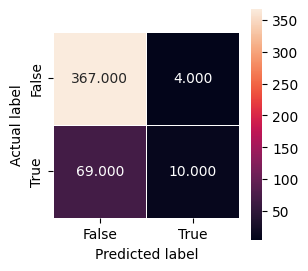

Accuracy: 0.8378
Precision: 0.7143
Recall: 0.1266
F1 Score: 0.2151


dynamic_fewshot_multi_table_gpt-3.5-turbo :
y_pred
False    417
True      33
Name: count, dtype: int64


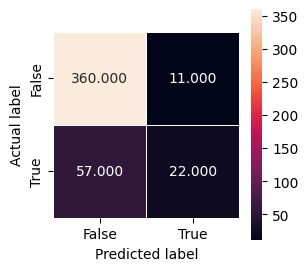

Accuracy: 0.8489
Precision: 0.6667
Recall: 0.2785
F1 Score: 0.3929


zero_shot_multi_table_gpt-4-turbo-preview :
y_pred
False    416
True      34
Name: count, dtype: int64


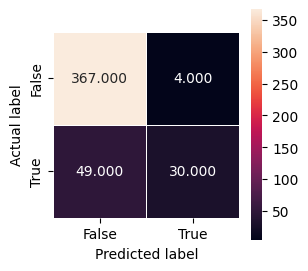

Accuracy: 0.8822
Precision: 0.8824
Recall: 0.3797
F1 Score: 0.5310


zero_shot_multi_table_gpt-3.5-turbo :
y_pred
False    422
True      28
Name: count, dtype: int64


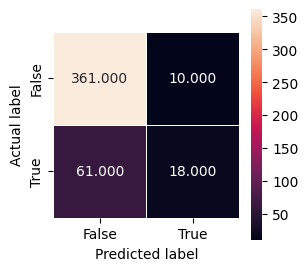

Accuracy: 0.8422
Precision: 0.6429
Recall: 0.2278
F1 Score: 0.3364


fix_fewshot_multi_table_gpt-3.5-turbo :
y_pred
False    404
True      46
Name: count, dtype: int64


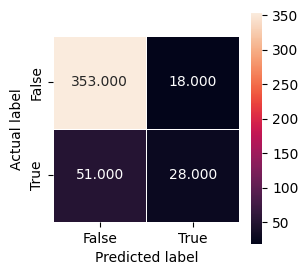

Accuracy: 0.8467
Precision: 0.6087
Recall: 0.3544
F1 Score: 0.4480


dynamic_fewshot_multi_table_gpt-4-turbo-preview :
y_pred
False    404
True      46
Name: count, dtype: int64


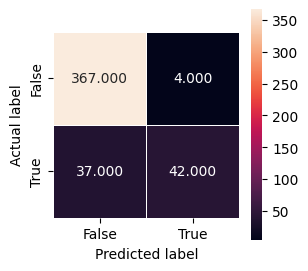

Accuracy: 0.9089
Precision: 0.9130
Recall: 0.5316
F1 Score: 0.6720


zero_shot_single_table_gpt-3.5-turbo :
y_pred
False    304
True     146
Name: count, dtype: int64


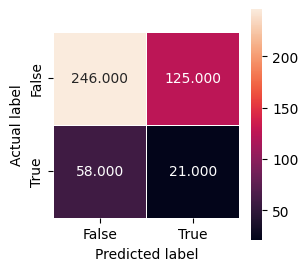

Accuracy: 0.5933
Precision: 0.1438
Recall: 0.2658
F1 Score: 0.1867


fix_fewshot_multi_table_gpt-4-turbo-preview :
y_pred
False    406
True      44
Name: count, dtype: int64


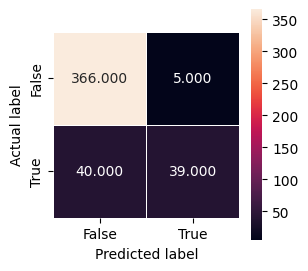

Accuracy: 0.9000
Precision: 0.8864
Recall: 0.4937
F1 Score: 0.6341




In [8]:
for i in range(len(file_paths)):
    df_data = pd.read_csv(file_paths[i])
    print(csv_files[i], ":")
    df_data = df_data.rename(columns={'match': 'y_true'})
    df_data = df_data.rename(columns={'match_pred': 'y_pred'})
    print(df_data['y_pred'].value_counts())
    multiclass_eval(df_data)
    print("\n")

